# Google Drive

In [1]:
####################################
#
#  ADD THIS TO EVERY COLAB FILE!
#
####################################

from google.colab import drive
drive.mount('/content/drive')

import drive.Shareddrives.GPTJ.project.settings as settings

PATH_PROJECT = settings.PATH_PROJECT
PATH_DATA = settings.PATH_DATA

Mounted at /content/drive


# Database - 102400 Tokens

In [ ]:
! ls -l /content/drive/Shareddrives/GPTJ/data/kaggle/proc-1/*.limit-102400.*.csv > /content/sizes.csv

total = 0
with open('/content/sizes.csv', 'r') as f:
    for line in f:
        size = line.split('root')[2].strip().split(' ')[0]
        total += int(size)

print('Total', total, 'KB')
print('Total', total/(1024**1), 'MB')
print('Total', total/(1024**3), 'GB')

Total 2885315769 KB
Total 2817691.1806640625 MB
Total 2.6871597105637193 GB


# Truncamento da base

In [2]:
import pandas as pd

path = PATH_PROJECT + '/tokens.csv'

df = pd.read_csv(
    path,
    names = ['label', 'split', 'file', 'size']
)

# for i in range(9):
#     print(i)
#     df_label = df[df['label'] == i]
#     print(df_label)

df

,label,split,file,size
0,0,train,A7fDZiS6LavrYlsRGhwj.asm,203407
1,0,train,GxB6dX7o5E0cP9rTnb2g.asm,60595
2,0,train,68icCkFVRJK5UtxLOqIu.asm,248964
3,0,train,64ZtULx71bBcduDiY8GO.asm,74437
4,0,train,2eqnSQrGfCXupwkDtIJ6.asm,276481
...,...,...,...,...
10052,8,test,c5ydbUrj02fYH9qo87Lt.asm,22116
10053,8,test,biR27No0uO3zlPjqGfJw.asm,31672
10054,8,test,82j5UBofDE7wucTk4CRJ.asm,86275
10055,8,test,b20QTKHoPdVzXRsZFG8C.asm,59094


In [4]:
import statistics
from matplotlib import pyplot as plt

trunc = 102400

x = df.index
y = sorted(list(df['size']))

print('Total', len(df))
df2 = df[df['size'] > trunc]
print('Truncados', len(df2), round(100*len(df2)/len(df), 2), '%')

Total 10057
Truncados 1498 14.9 %


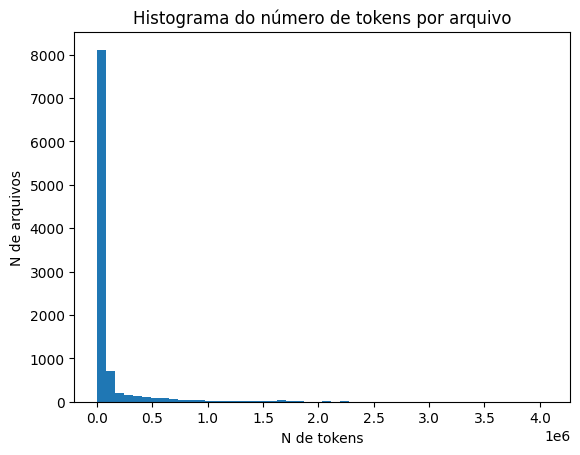

In [5]:
# plt.style.use('seaborn')
plt.style.use('default')

plt.hist(y, bins=50)
plt.title('Histograma do número de tokens por arquivo')
plt.xlabel('N de tokens')
plt.ylabel('N de arquivos')
plt.gca()
plt.savefig('/content/hist_arquivos.png', dpi=300, facecolor=(1.0, 1.0, 1.0, 1.0))

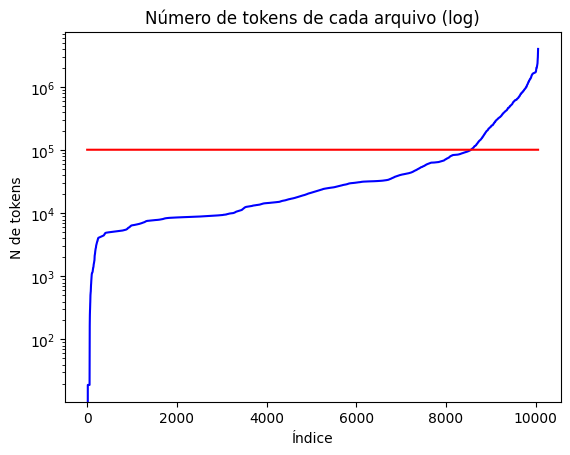

In [10]:
y2 = [trunc]*len(y)
# y3 = [2*trunc]*len(y)
# y4 = [4*trunc]*len(y)

plt.title('Número de tokens de cada arquivo (log)')
plt.plot(x, y, color ='b')
plt.plot(x, y2, color ='r')
# plt.plot(x, y3, color ='r')
# plt.plot(x, y4, color ='r')
plt.xlabel('Índice')
plt.ylabel('N de tokens')
plt.yscale('log')
plt.gca()
plt.savefig('/content/tam_arquivos_log.png', dpi=300, facecolor=(1.0, 1.0, 1.0, 1.0))

In [ ]:
! pip install -q evaluate

In [ ]:
import evaluate
from sklearn.metrics import confusion_matrix

# limit-10240.chunk-32.epochs-1.batch-160

path = '/content/drive/Shareddrives/GPTJ/data/gpt2/all.limit-10240.chunk-32.epochs-1.batch-160/results.csv'
df2 = pd.read_csv(
    path,
    # names = ['label', 'split', 'file', 'size']
)

cm = confusion_matrix(df2['ref'], df2['pred_all'])
print(cm)

df3 = df2[df2['pred_all'] != df2['ref']]
l = list(df3['file_id'])
l = [x + '.asm' for x in l]
l

[[150   2   0   0   0   0   0   2   0]
 [  1 246   0   0   0   0   0   0   0]
 [  0   0 294   0   0   0   0   0   0]
 [  0   0   0  47   0   0   0   0   0]
 [  0   1   0   0   3   0   0   0   0]
 [  0   0   0   0   0  75   0   0   0]
 [  1   0   1   0   0   0  37   0   0]
 [  5   0   0   0   0   0   0 117   0]
 [  0   0   0   0   0   0   0   1 100]]


['gGbvOKAXCB5047PEf6aS.asm',
 '7wpdECAtSosOImULRkQW.asm',
 '9mY8AhRLj5XKq17k2ZTx.asm',
 'g4N1hd78brza3nYsHQfG.asm',
 'BVSHRsC20rP3z6ZLmfnK.asm',
 'gB105vrJPbcGCtuj7p4a.asm',
 'AXvM7mlBfJ8eHVDcspNz.asm',
 'F58JACMhQPSYrdxqBW2p.asm',
 'K1TBRacdPrvqOXCjDw2J.asm',
 '9MAtXYCG3brN6auwUjQO.asm',
 'AhEcNQy9nYHdfzZreoX1.asm',
 'GmH1ULjobZKMkcVRyqQs.asm',
 '8fcWqDA6KsarzG3E9YJ7.asm',
 'b8KgVcy57AWMQtHEqdxo.asm']

In [ ]:
path = PATH_PROJECT + '/tokens.csv'

df = pd.read_csv(
    path,
    names = ['label', 'split', 'file', 'size']
)

# for i in range(9):
#     print(i)
#     df_label = df[df['label'] == i]
#     print(df_label)

df.loc[df['file'].isin(l)]

,label,split,file,size
8990,0,test,gGbvOKAXCB5047PEf6aS.asm,131546
9073,0,test,7wpdECAtSosOImULRkQW.asm,281362
9099,0,test,9mY8AhRLj5XKq17k2ZTx.asm,428699
9121,0,test,g4N1hd78brza3nYsHQfG.asm,1105170
9318,1,test,BVSHRsC20rP3z6ZLmfnK.asm,53648
9716,4,test,gB105vrJPbcGCtuj7p4a.asm,16578
9796,6,test,AXvM7mlBfJ8eHVDcspNz.asm,2076962
9821,6,test,F58JACMhQPSYrdxqBW2p.asm,335
9843,7,test,K1TBRacdPrvqOXCjDw2J.asm,509937
9871,7,test,9MAtXYCG3brN6auwUjQO.asm,17513
